In [10]:
from astropy.io import fits
import numpy as np
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import astropy.units as u
from fil_finder import FilFinder2D #, Filament2D
from scipy.optimize import curve_fit
########################
import aplpy
import copy
import glob


In [11]:
files = glob.glob("/home/filament/Desktop/integ_fits_20220609/V4*.fits")

In [13]:
len(files)

9

In [2]:
d, bmaj = 10, 0.2706

# fits_pwd = "test_1_-50_-30.fits"
fits_pwd = "/home/filament/Desktop/fil_result/integ_fits/region6/region6V4_p120_p45.fits"
hdu = fits.open(fits_pwd)[0]
hdr1 = hdu.header
integ_hdu = hdu

w = WCS(hdu)

In [3]:
integ_hdu.data

int_count = 0
nan_count = 0
for i in integ_hdu.data:
    for j in i:
        if np.isnan(j) == False:
            int_count += 1
        if np.isnan(j) == True:
            nan_count +=1
            

In [4]:
integ_hdu.data.shape[0]*integ_hdu.data.shape[1]

14571901

In [5]:
integ_hdu.data.shape[0]*integ_hdu.data.shape[1] == int_count+nan_count

True

In [6]:
int_count

1339824

In [7]:
nan_count

13232077

In [8]:
fits_name = fits_pwd.split("/")[7]
fits_name

'region6V4_p120_p45.fits'

In [4]:
if fits_name.split("_")[1] == str(1):
    region_name = "region1"
elif fits_name.split("_")[1] == str(2):
    region_name = "region2"
elif fits_name.split("_")[1] == str(3):
    region_name = "region3"
elif fits_name.split("_")[1] == str(4):
    region_name = "region4"
elif fits_name.split("_")[1] == str(5):
    region_name = "region5"
elif fits_name.split("_")[1] == str(6):
    region_name = "region6"

INFO: Auto-setting vmin to -1.569e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.735e+03 [aplpy.core]


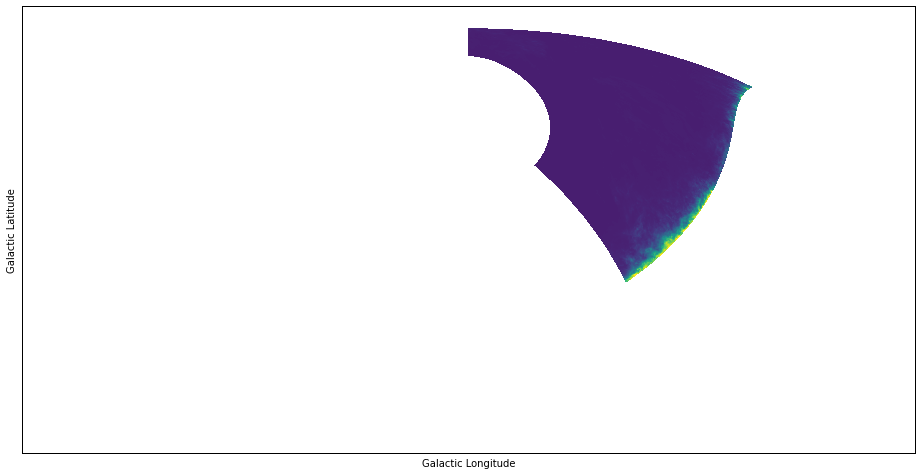

In [9]:
fig = plt.figure(figsize=(16,16))
f = aplpy.FITSFigure(hdu,figure=fig)
f.show_colorscale()
plt.show()

In [6]:
xpix_tempo,ypix_tempo = w.wcs_world2pix(0,20,0)
integ_hdu.data[:int(ypix_tempo),:]=np.nan

INFO: Auto-setting vmin to -1.703e+00 [aplpy.core]
INFO: Auto-setting vmax to  7.958e+00 [aplpy.core]


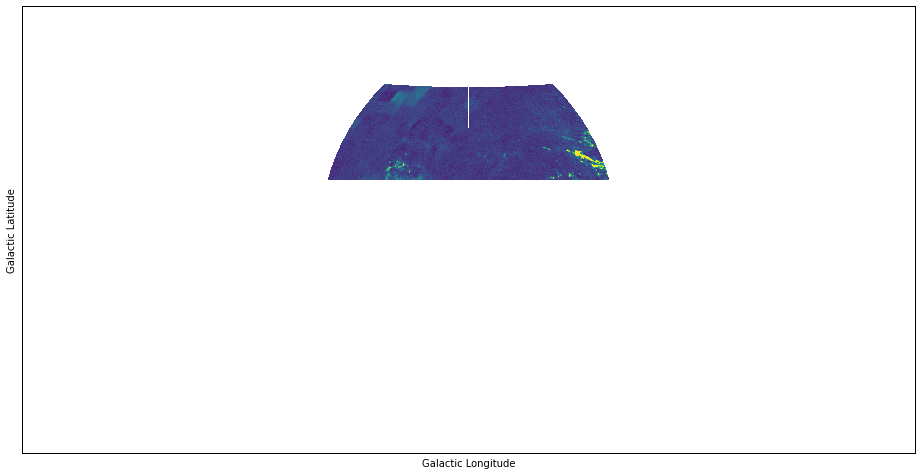

In [7]:
fig = plt.figure(figsize=(16,16))
f = aplpy.FITSFigure(integ_hdu,figure=fig)
f.show_colorscale()
plt.show()

In [8]:
integ_fits = fits.PrimaryHDU(integ_hdu.data,hdu.header)


In [9]:
region_name,fits_name

('region6', 'test_6_70_100.fits')

In [10]:
integ_fits.writeto("/home/filament/Desktop/fil_result/new_integ_fits/%s/%s"%(region_name,fits_name))

In [18]:
integ_hdu.data.shape[0]*integ_hdu.data.shape[1]

14571901

In [26]:
integ_hdu.data[0][0]

nan

In [33]:
int_count

817684

In [37]:
nan_count

13754217

In [35]:
integ_hdu.data.shape[0]*integ_hdu.data.shape[1] == int_count+nan_count

True